In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from pandas.tseries.offsets import BDay
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [3]:
df_main = pd.read_csv('RELIANCE.csv')
df_main.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [4]:
df_main.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.0,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
5302,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.2,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
5303,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.0,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
5304,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.5,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527
5305,2021-04-30,RELIANCE,EQ,2024.05,2008.50,2036.0,1987.55,1995.90,1994.50,2010.20,9150974,1.839532e+15,288687.0,3902504.0,0.4265


In [5]:
df_main.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)

In [6]:
df_main.shape

(5306, 12)

In [7]:
time = pd.date_range(start='2000-01-03',periods=5306,freq=BDay())
df_main['time_stamp'] = pd.DataFrame(time)
df_main.drop(['Date'],axis=1,inplace=True)
df_main = df_main.set_index('time_stamp')

In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2020-05-04
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      5306 non-null   object 
 1   Series      5306 non-null   object 
 2   Prev Close  5306 non-null   float64
 3   Open        5306 non-null   float64
 4   High        5306 non-null   float64
 5   Low         5306 non-null   float64
 6   Last        5306 non-null   float64
 7   Close       5306 non-null   float64
 8   VWAP        5306 non-null   float64
 9   Volume      5306 non-null   int64  
 10  Turnover    5306 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 497.4+ KB


In [9]:
df_main.isnull().sum()

Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64

In [10]:
df = df_main[['Close']]

In [11]:
df

,Close
time_stamp,
2000-01-03,251.70
2000-01-04,271.85
2000-01-05,282.50
2000-01-06,294.35
2000-01-07,314.55
...,...
2020-04-28,1937.85
2020-04-29,1988.65
2020-04-30,1997.30


In [12]:
df.head()

,Close
time_stamp,
2000-01-03,251.70
2000-01-04,271.85
2000-01-05,282.50
2000-01-06,294.35
2000-01-07,314.55


In [13]:
df.tail()

,Close
time_stamp,
2020-04-28,1937.85
2020-04-29,1988.65
2020-04-30,1997.30
2020-05-01,2024.05
2020-05-04,1994.50


In [14]:
df.shape

(5306, 1)

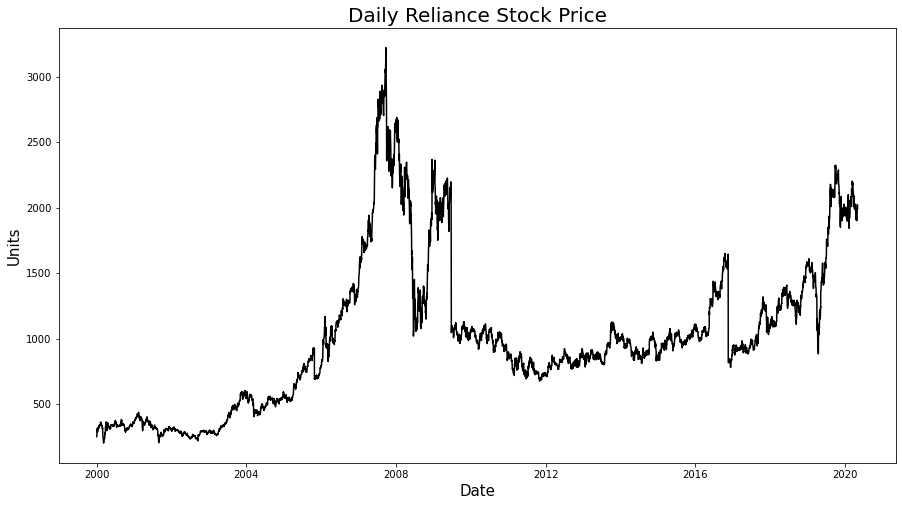

In [15]:
plt.plot(df,color='black')
plt.title('Daily Reliance Stock Price',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Units',fontsize=15)
plt.show()

In [16]:
plt.rcParams['figure.figsize'] = [15,8]

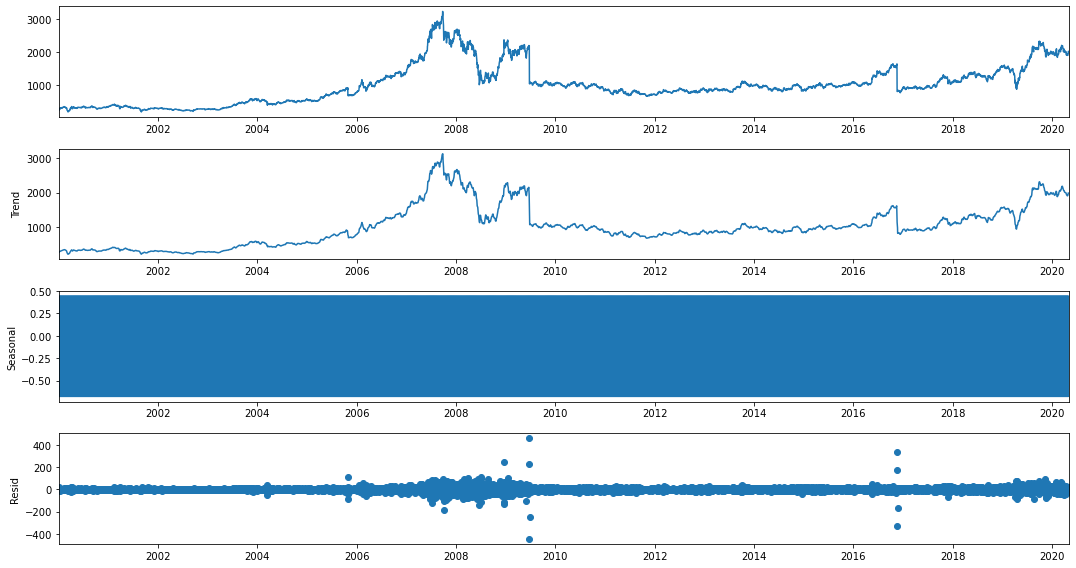

In [17]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

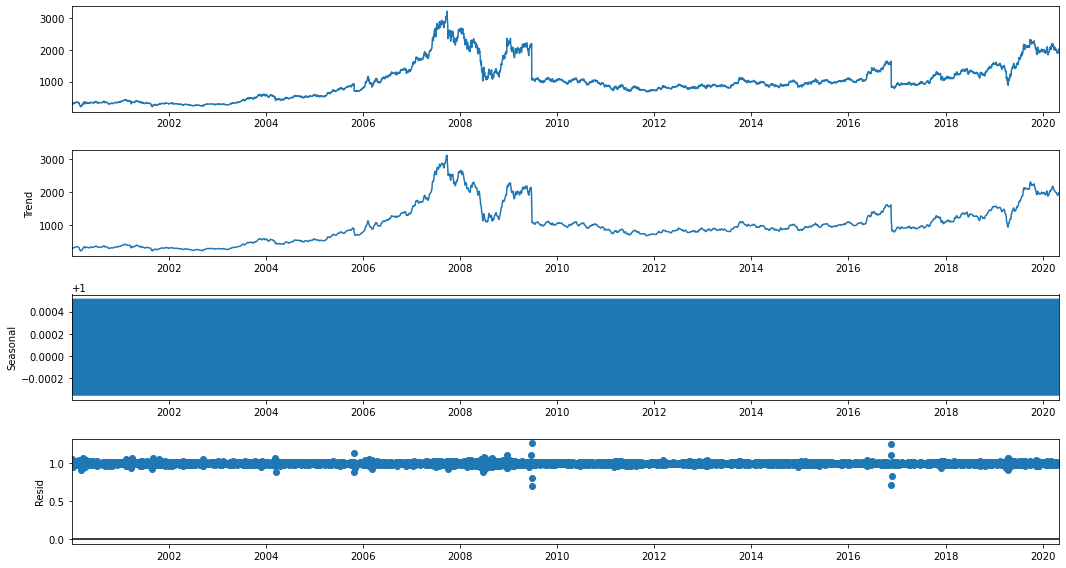

In [18]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

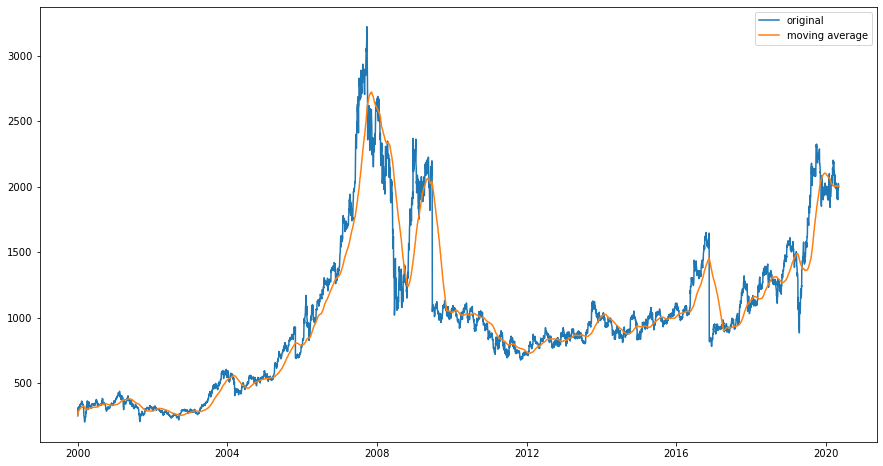

In [19]:
plt.plot(df,label='original')
plt.plot(df.rolling(100,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [20]:
# Model building - Exponential Smoothing Techniques

In [21]:
train = df.iloc[:4775]
test = df.iloc[4775:]

In [22]:
train.tail()

,Close
time_stamp,
2018-04-16,1223.50
2018-04-17,1231.05
2018-04-18,1226.05
2018-04-19,1237.65
2018-04-20,1264.80


In [23]:
test.head()

,Close
time_stamp,
2018-04-23,1270.25
2018-04-24,1267.10
2018-04-25,1304.10
2018-04-26,1331.35
2018-04-27,1347.30


In [24]:
len(train)

4775

In [25]:
len(test)

531

##### Simple Exponential Smoothing

In [26]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(optimized=True)
SES_model.summary()

Dep. Variable:,Close,No. Observations:,4775
Model:,SimpleExpSmoothing,SSE,5265497.114
Optimized:,True,AIC,33455.439
Trend:,None,BIC,33468.381
Seasonal:,None,AICC,33455.447
Seasonal Periods:,None,Date:,"Sun, 27 Mar 2022"
Box-Cox:,False,Time:,10:27:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,240.55333,l.0,True


In [27]:
SES_predict = SES_model.forecast(len(test))

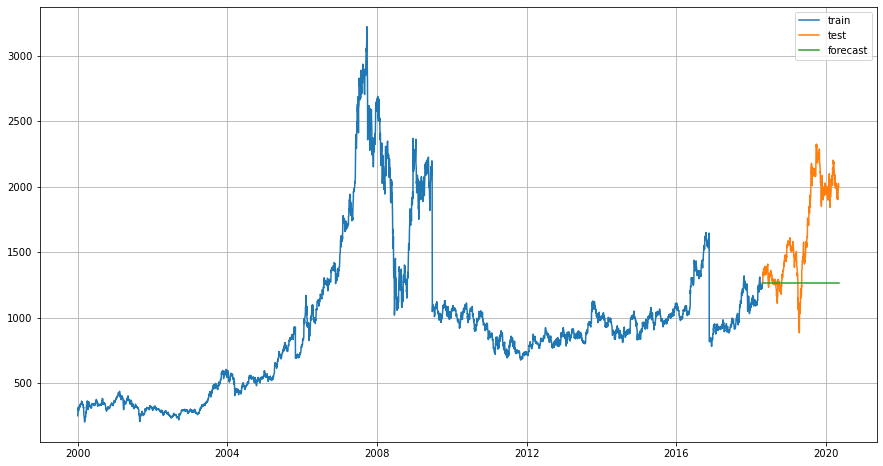

In [28]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [29]:
print("MAE:",MAE(test['Close'],SES_predict))
print("MAPE:",MAPE(test['Close'],SES_predict))

MAE: 395.5647837269203
MAPE: 21.21592864801573


##### Double Exponential Smoothing

In [30]:
DES = Holt(train,exponential=False,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=0.4950000,
                   smoothing_trend=0.0236905)
DES_model.summary()

Dep. Variable:,Close,No. Observations:,4775
Model:,Holt,SSE,7180634.630
Optimized:,True,AIC,34940.702
Trend:,Additive,BIC,34966.586
Seasonal:,None,AICC,34940.719
Seasonal Periods:,None,Date:,"Sun, 27 Mar 2022"
Box-Cox:,False,Time:,10:27:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4950000,alpha,False
smoothing_trend,0.0236905,beta,False


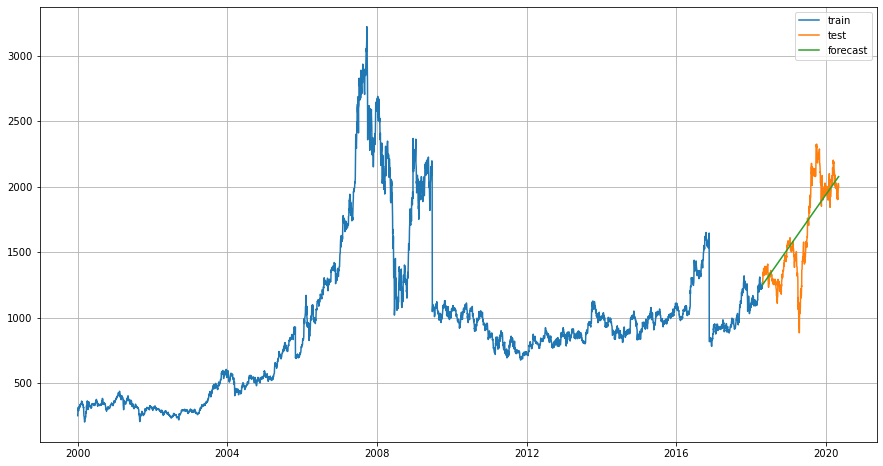

In [31]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [32]:
print("MAE:",MAE(test['Close'],DES_predict))
print("MAPE:",MAPE(test['Close'],DES_predict))

MAE: 154.4048518240244
MAPE: 10.323933969527287


##### Triple Exponential Smoothing

In [97]:
TES = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',
                           initialization_method='estimated')
TES_model = TES.fit(smoothing_level=0.4950000,
                   smoothing_trend=0.0236905,
                   smoothing_seasonal=0.020000)
TES_model.summary()

Dep. Variable:,Close,No. Observations:,4775
Model:,ExponentialSmoothing,SSE,7220442.552
Optimized:,True,AIC,34977.100
Trend:,Additive,BIC,35035.341
Seasonal:,Multiplicative,AICC,34977.156
Seasonal Periods:,5,Date:,"Sun, 27 Mar 2022"
Box-Cox:,False,Time:,11:33:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4950000,alpha,False
smoothing_trend,0.0236905,beta,False


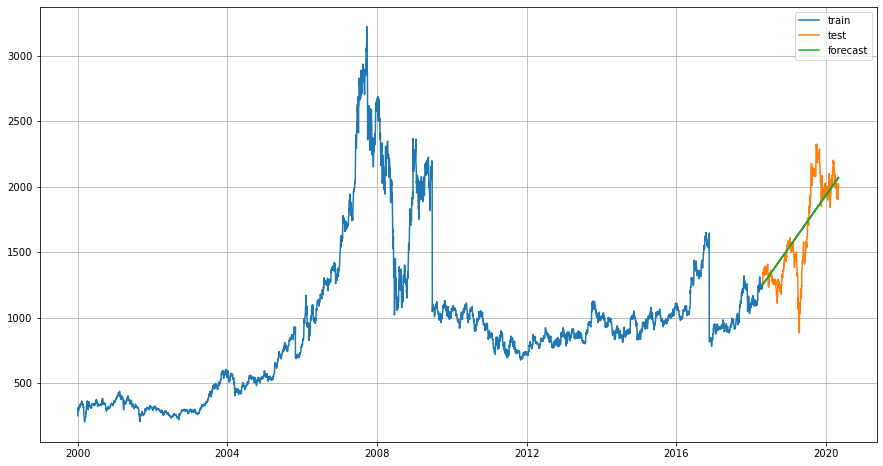

In [98]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [100]:
print("MAE:",MAE(test['Close'],TES_predict))
print("MAPE:",MAPE(test['Close'],TES_predict))

MAE: 154.41152820523226
MAPE: 10.298464172378557


##### ACF and PACF plots

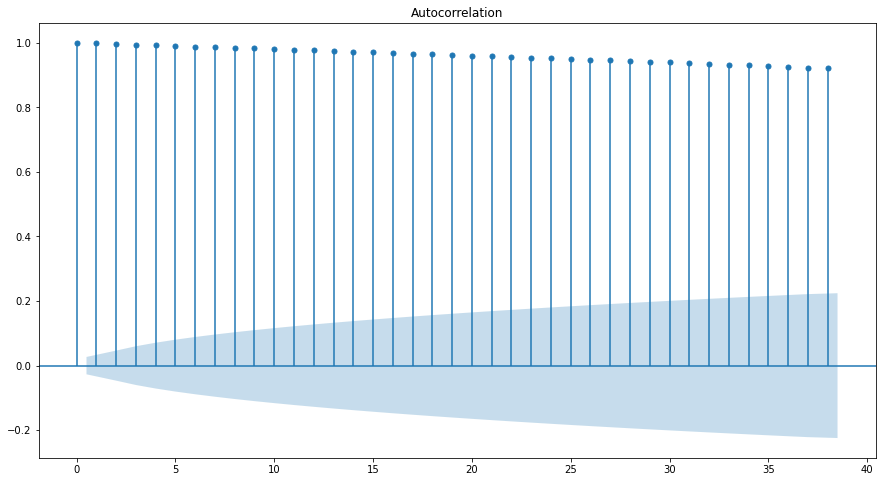

In [101]:
plot_acf(df)
plt.show()

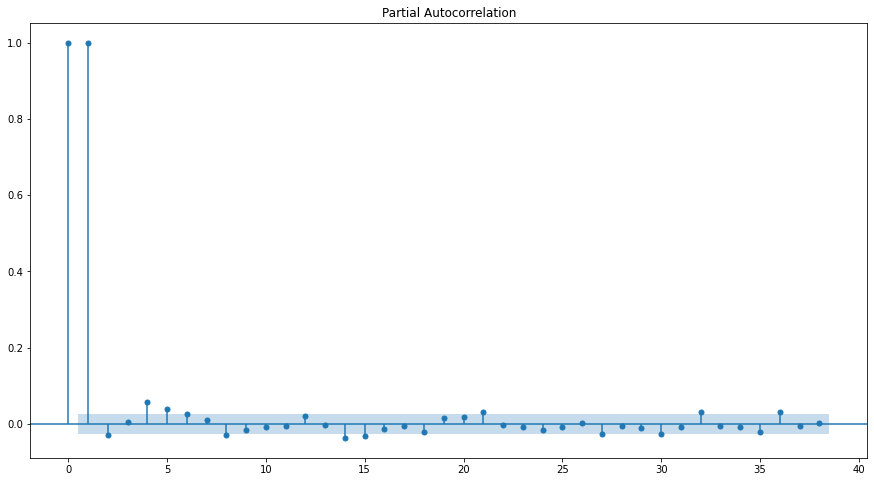

In [102]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [103]:
observations = df.values
df_results = adfuller(observations)
df_results

(-1.849052109725112,
 0.3563947012604239,
 20,
 5285,
 {'1%': -3.4315879335861528,
  '5%': -2.8620870392750826,
  '10%': -2.567061188553313},
 51954.603996058315)

In [87]:
##### Non-stationary series -- proceed with ARIMA & SARIMA model

In [104]:
diff = df.diff(periods=1).dropna()
observations = diff.values
df_results = adfuller(observations)
df_results

(-16.503016715152203,
 2.139984830599539e-29,
 19,
 5285,
 {'1%': -3.4315879335861528,
  '5%': -2.8620870392750826,
  '10%': -2.567061188553313},
 51947.14808072066)

##### ARIMA Model

In [105]:
import itertools

In [106]:
p = q = range(0,7)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
print("Parameter combinations are:")
for i in range(1,len(pdq)):
    print("ARIMA",pdq[i])

Parameter combinations are:
ARIMA (0, 1, 1)
ARIMA (0, 1, 2)
ARIMA (0, 1, 3)
ARIMA (0, 1, 4)
ARIMA (0, 1, 5)
ARIMA (0, 1, 6)
ARIMA (1, 1, 0)
ARIMA (1, 1, 1)
ARIMA (1, 1, 2)
ARIMA (1, 1, 3)
ARIMA (1, 1, 4)
ARIMA (1, 1, 5)
ARIMA (1, 1, 6)
ARIMA (2, 1, 0)
ARIMA (2, 1, 1)
ARIMA (2, 1, 2)
ARIMA (2, 1, 3)
ARIMA (2, 1, 4)
ARIMA (2, 1, 5)
ARIMA (2, 1, 6)
ARIMA (3, 1, 0)
ARIMA (3, 1, 1)
ARIMA (3, 1, 2)
ARIMA (3, 1, 3)
ARIMA (3, 1, 4)
ARIMA (3, 1, 5)
ARIMA (3, 1, 6)
ARIMA (4, 1, 0)
ARIMA (4, 1, 1)
ARIMA (4, 1, 2)
ARIMA (4, 1, 3)
ARIMA (4, 1, 4)
ARIMA (4, 1, 5)
ARIMA (4, 1, 6)
ARIMA (5, 1, 0)
ARIMA (5, 1, 1)
ARIMA (5, 1, 2)
ARIMA (5, 1, 3)
ARIMA (5, 1, 4)
ARIMA (5, 1, 5)
ARIMA (5, 1, 6)
ARIMA (6, 1, 0)
ARIMA (6, 1, 1)
ARIMA (6, 1, 2)
ARIMA (6, 1, 3)
ARIMA (6, 1, 4)
ARIMA (6, 1, 5)
ARIMA (6, 1, 6)


In [73]:
df_score_arima = pd.DataFrame(columns=['param','aic'])
df_score_arima

,param,aic


In [74]:
from warnings import filterwarnings
filterwarnings('ignore')

In [75]:
for param in pdq:
    try:
        model = ARIMA(train,order=param)
        arima_results = model.fit()
        print("ARIMA",param,"AIC:",arima_results.aic)
        df_score_arima = df_score_arima.append({'param':param,'aic':arima_results.aic},ignore_index=True)
    except:
        continue

ARIMA (0, 1, 0) AIC: 46997.150413190866
ARIMA (0, 1, 1) AIC: 46992.87622116437
ARIMA (0, 1, 2) AIC: 46994.84815573772
ARIMA (0, 1, 3) AIC: 46973.87894561254
ARIMA (0, 1, 4) AIC: 46970.925725202695
ARIMA (0, 1, 5) AIC: 46966.490664091194
ARIMA (0, 1, 6) AIC: 46967.62830689669
ARIMA (1, 1, 0) AIC: 46992.88625346185
ARIMA (1, 1, 1) AIC: 46994.87077856956
ARIMA (1, 1, 2) AIC: 46984.339770066435
ARIMA (1, 1, 3) AIC: 46967.86228340625
ARIMA (2, 1, 0) AIC: 46994.8113612089
ARIMA (2, 1, 1) AIC: 46981.81965584202
ARIMA (2, 1, 2) AIC: 46955.85382334749
ARIMA (3, 1, 0) AIC: 46973.14654683955
ARIMA (3, 1, 1) AIC: 46965.04038775457
ARIMA (4, 1, 0) AIC: 46969.1582959267
ARIMA (4, 1, 1) AIC: 46966.65897076525
ARIMA (4, 1, 2) AIC: 46958.56864946188
ARIMA (4, 1, 3) AIC: 46959.14062196318
ARIMA (4, 1, 4) AIC: 46959.524656098234
ARIMA (5, 1, 0) AIC: 46963.270157069695
ARIMA (5, 1, 1) AIC: 46964.94829077226
ARIMA (5, 1, 2) AIC: 46953.38385403176
ARIMA (5, 1, 3) AIC: 46955.30193886026
ARIMA (5, 1, 4) AIC: 

In [78]:
df_score_arima.sort_values('aic')

,param,aic
23,"(5, 1, 2)",46953.383854
24,"(5, 1, 3)",46955.301939
30,"(6, 1, 2)",46955.334428
13,"(2, 1, 2)",46955.853823
25,"(5, 1, 4)",46956.815161
31,"(6, 1, 3)",46957.299220
26,"(5, 1, 5)",46957.599318
32,"(6, 1, 4)",46958.464128
18,"(4, 1, 2)",46958.568649
19,"(4, 1, 3)",46959.140622


In [107]:
arima_model = ARIMA(train,(2,1,2))
arima_results = arima_model.fit()
print(arima_results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4774
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -23471.927
Method:                       css-mle   S.D. of innovations             33.038
Date:                Sun, 27 Mar 2022   AIC                          46955.854
Time:                        12:33:47   BIC                          46994.679
Sample:                    01-04-2000   HQIC                         46969.494
                         - 04-20-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2113      0.467      0.453      0.651      -0.703       1.126
ar.L1.D.Close     1.2230      0.049     24.793      0.000       1.126       1.320
ar.L2.D.Close    -0.8355      0.045    -

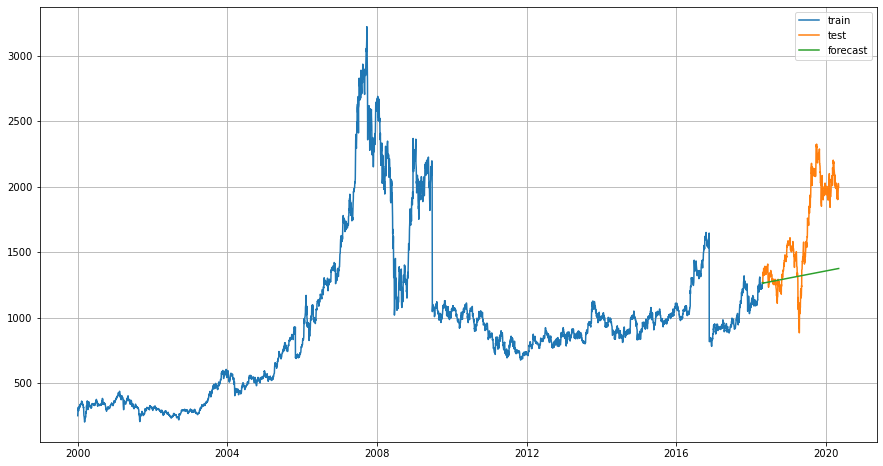

In [108]:
forecasted_values_arima = pd.Series(arima_results.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arima,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [109]:
print("MAE:",MAE(test['Close'],forecasted_values_arima))
print("MAPE:",MAPE(test['Close'],forecasted_values_arima))

MAE: 350.5677170759899
MAPE: 18.902854382987773


##### SARIMA Model

In [162]:
import itertools

In [97]:
p = q = range(0,4)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],4) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [98]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (0, 1, 0) (0, 1, 0, 4) AIC: 50443.68032405041
SARIMAX (0, 1, 0) (0, 1, 1, 4) AIC: 46930.386272535616
SARIMAX (0, 1, 0) (0, 1, 2, 4) AIC: 46888.50682223198
SARIMAX (0, 1, 0) (0, 1, 3, 4) AIC: 46848.840833619295
SARIMAX (0, 1, 0) (1, 1, 0, 4) AIC: 48800.21623770364
SARIMAX (0, 1, 0) (1, 1, 1, 4) AIC: 46924.39724092888
SARIMAX (0, 1, 0) (1, 1, 2, 4) AIC: 46883.68015182373
SARIMAX (0, 1, 0) (1, 1, 3, 4) AIC: 46849.18470360914
SARIMAX (0, 1, 0) (2, 1, 0, 4) AIC: 48231.362072560056
SARIMAX (0, 1, 0) (2, 1, 1, 4) AIC: 46894.856499994145
SARIMAX (0, 1, 0) (2, 1, 2, 4) AIC: 46885.66534868462
SARIMAX (0, 1, 0) (2, 1, 3, 4) AIC: 46851.07015197707
SARIMAX (0, 1, 0) (3, 1, 0, 4) AIC: 47898.49593967937
SARIMAX (0, 1, 0) (3, 1, 1, 4) AIC: 46859.869649521715
SARIMAX (0, 1, 0) (3, 1, 2, 4) AIC: 46859.9208435315
SARIMAX (0, 1, 0) (3, 1, 3, 4) AIC: 46852.70405226856
SARIMAX (0, 1, 1) (0, 1, 0, 4) AIC: 50398.04898010453
SARIMAX (0, 1, 1) (0, 1, 1, 4) AIC: 46916.892207948535
SARIMAX (0, 1, 1) (0, 1

SARIMAX (2, 1, 1) (2, 1, 0, 4) AIC: 47895.67106951902
SARIMAX (2, 1, 1) (2, 1, 1, 4) AIC: 46877.417947701426
SARIMAX (2, 1, 1) (2, 1, 2, 4) AIC: 47378.478534939844
SARIMAX (2, 1, 1) (2, 1, 3, 4) AIC: 46880.80464537125
SARIMAX (2, 1, 1) (3, 1, 0, 4) AIC: 47642.74989457864
SARIMAX (2, 1, 1) (3, 1, 1, 4) AIC: 46891.64481432893
SARIMAX (2, 1, 1) (3, 1, 2, 4) AIC: 46842.19303673791
SARIMAX (2, 1, 1) (3, 1, 3, 4) AIC: 47077.76975299152
SARIMAX (2, 1, 2) (0, 1, 0, 4) AIC: 48972.01723351877
SARIMAX (2, 1, 2) (0, 1, 1, 4) AIC: 46870.273125409745
SARIMAX (2, 1, 2) (0, 1, 2, 4) AIC: 46852.6685714695
SARIMAX (2, 1, 2) (0, 1, 3, 4) AIC: 46804.54277049472
SARIMAX (2, 1, 2) (1, 1, 0, 4) AIC: 48011.361922309254
SARIMAX (2, 1, 2) (1, 1, 1, 4) AIC: 46871.558275174444
SARIMAX (2, 1, 2) (1, 1, 2, 4) AIC: 46837.32407073886
SARIMAX (2, 1, 2) (1, 1, 3, 4) AIC: 46813.87691123143
SARIMAX (2, 1, 2) (2, 1, 0, 4) AIC: 47882.74655764485
SARIMAX (2, 1, 2) (2, 1, 1, 4) AIC: 46853.23386383501
SARIMAX (2, 1, 2) (2, 1,

In [99]:
df_score.sort_values('aic')

,param,seasonal,aic
115,"(1, 1, 3)","(0, 1, 3, 4)",46801.456560
51,"(0, 1, 3)","(0, 1, 3, 4)",46802.173173
55,"(0, 1, 3)","(1, 1, 3, 4)",46802.553131
119,"(1, 1, 3)","(1, 1, 3, 4)",46802.671074
59,"(0, 1, 3)","(2, 1, 3, 4)",46803.367139
...,...,...,...
16,"(0, 1, 1)","(0, 1, 0, 4)",50398.048980
128,"(2, 1, 0)","(0, 1, 0, 4)",50399.583628
80,"(1, 1, 1)","(0, 1, 0, 4)",50399.630380
64,"(1, 1, 0)","(0, 1, 0, 4)",50407.572270


In [110]:
model = SARIMAX(train,
                       order = (1,1,3),
                       seasonal_order = (0,1,3,4),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()

In [111]:
print(sarimax_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 4775
Model:             SARIMAX(1, 1, 3)x(0, 1, 3, 4)   Log Likelihood              -23392.728
Date:                           Sun, 27 Mar 2022   AIC                          46801.457
Time:                                   12:36:07   BIC                          46853.190
Sample:                               01-03-2000   HQIC                         46819.635
                                    - 04-20-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4878      0.108      4.500      0.000       0.275       0.700
ma.L1         -0.4564      0.109     -4.176

In [114]:
forecast = sarimax_results.forecast(len(test))

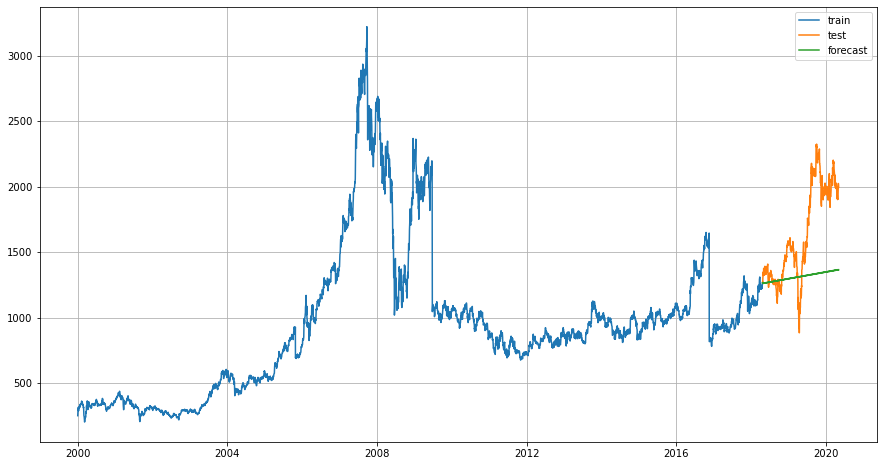

In [115]:
# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [117]:
print("MAE:",MAE(test['Close'],forecast))
print("MAPE:",MAPE(test['Close'],forecast))

MAE: 354.79471310631806
MAPE: 19.122253698474324


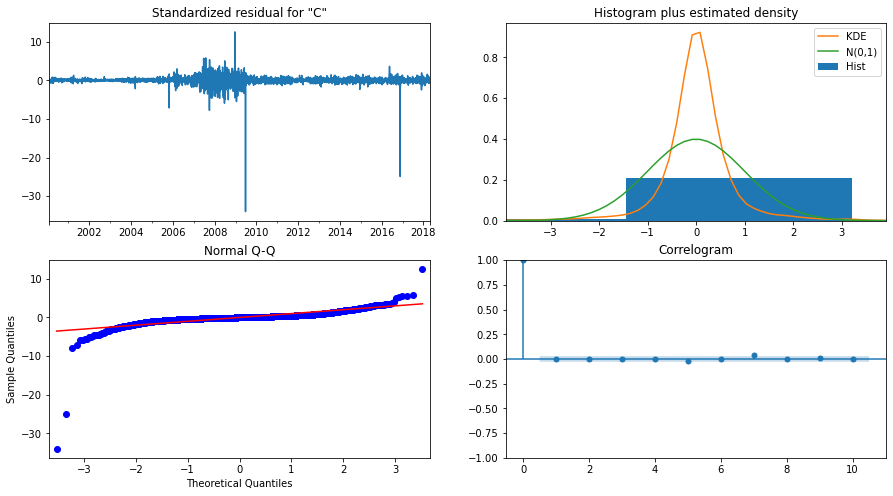

In [105]:
sarimax_results.plot_diagnostics();

# ARCH/GARCH Model

In [118]:
df

,Close
time_stamp,
2000-01-03,251.70
2000-01-04,271.85
2000-01-05,282.50
2000-01-06,294.35
2000-01-07,314.55
...,...
2020-04-28,1937.85
2020-04-29,1988.65
2020-04-30,1997.30


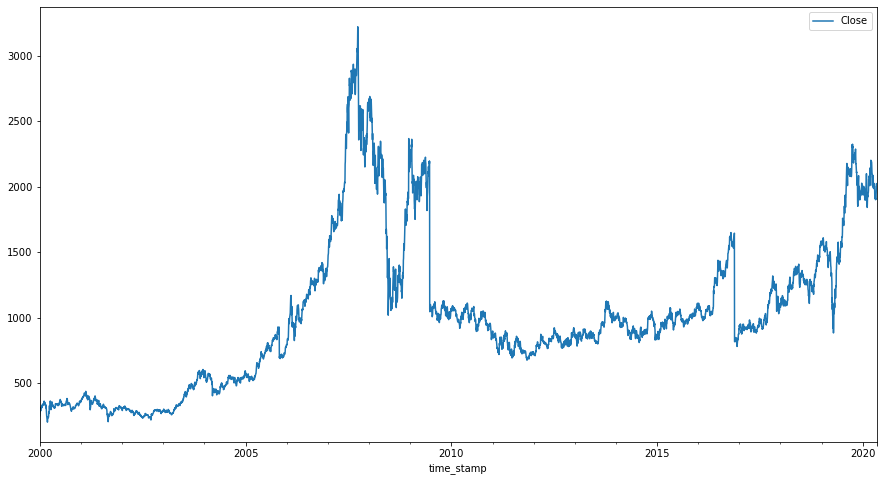

In [119]:
df.plot()
plt.show()

In [120]:
TES = ExponentialSmoothing(df,trend='additive',seasonal='multiplicative',initialization_method='estimated')
TES_model = TES.fit(smoothing_level=0.4950000,
                   smoothing_trend=0.0236905,
                   smoothing_seasonal=0.020000)
TES_model.summary()

Dep. Variable:,Close,No. Observations:,5306
Model:,ExponentialSmoothing,SSE,8099655.904
Optimized:,True,AIC,38914.899
Trend:,Additive,BIC,38974.088
Seasonal:,Multiplicative,AICC,38914.949
Seasonal Periods:,5,Date:,"Sun, 27 Mar 2022"
Box-Cox:,False,Time:,15:47:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4950000,alpha,False
smoothing_trend,0.0236905,beta,False


In [123]:
resid = TES_model.resid

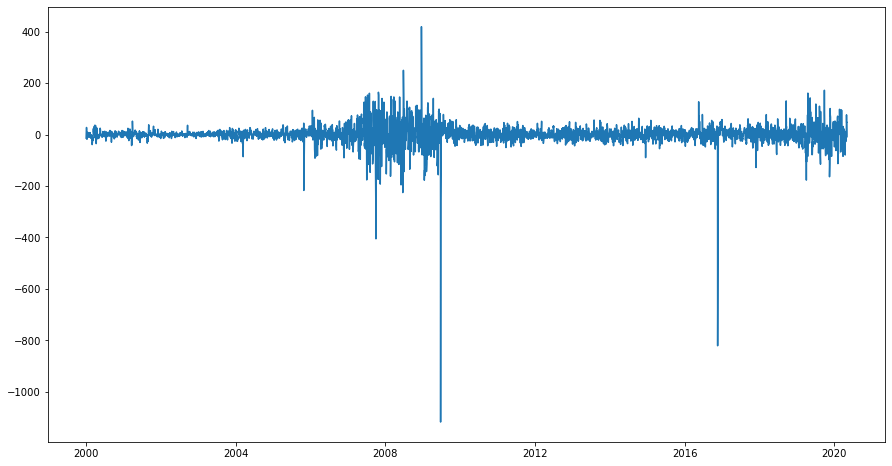

In [124]:
plt.plot(resid)
plt.show()

In [125]:
resid_df = pd.DataFrame(resid,columns=['residuals'])

In [126]:
resid_df.shape

(5306, 1)

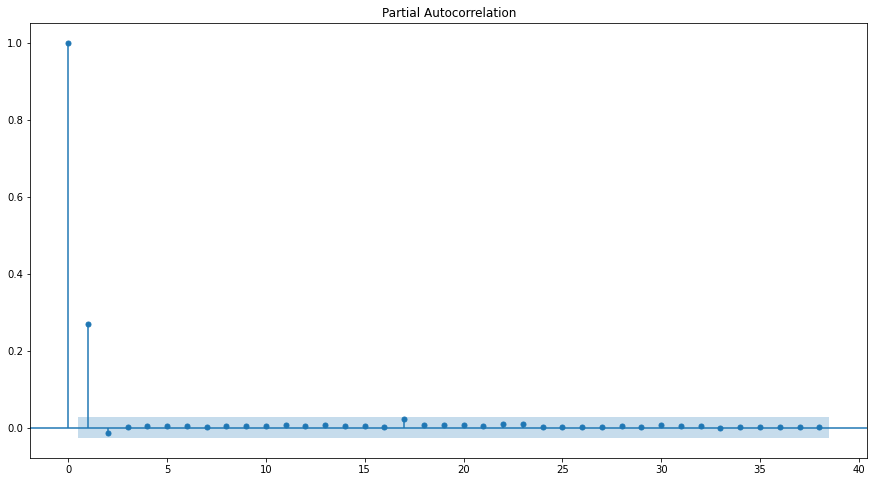

In [127]:
plot_pacf(resid_df**2)
plt.show()

##### ARCH - 1 Model

In [129]:
model_1 = arch_model(resid_df,p=1,q=0)
model_fit_1 = model_1.fit(disp='off')
model_fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -25507.5
Distribution:                  Normal   AIC:                           51020.9
Method:            Maximum Likelihood   BIC:                           51040.6
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        15:50:48   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -4.5521      2.052     -2.219  2.651e-02 [ -8.574, -0.531]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        373.5476     63.159      5.914  3.332e-09 [2.498e+02,4.973e+02]
alpha[1]       1.0000      0.343      2.915  3.554e-03     [  0.328,  1.672]
============================================================================

Covariance estimator: robust
"""

In [133]:
rolling_predictions = []
test_size = 1000

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

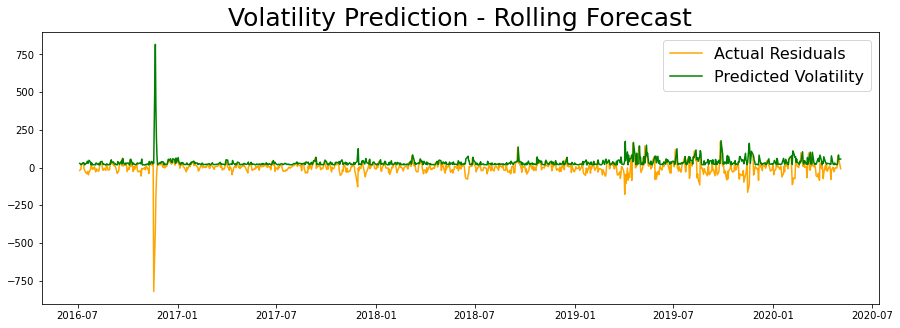

In [134]:
plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH (1,1) Model

In [135]:
model_2 = arch_model(resid_df,p=1,q=1)
model_fit_2 = model_2.fit(disp='off')
model_fit_2.summary()

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24288.6
Distribution:                  Normal   AIC:                           48585.2
Method:            Maximum Likelihood   BIC:                           48611.5
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        15:57:42   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3619      6.572 -5.506e-02      0.956 [-13.243, 12.519]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.5654     52.965  6.732e-02      0.946 [-1.002e+02,1.074e+02]
alpha[1]       0.1219      0.443      0.275      0.783      [ -0.747,  0.991]
beta[1]        0.8784      0.648      1.355      0.175      [ -0.392,  2.149]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [136]:
rolling_predictions = []
test_size = 1000

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

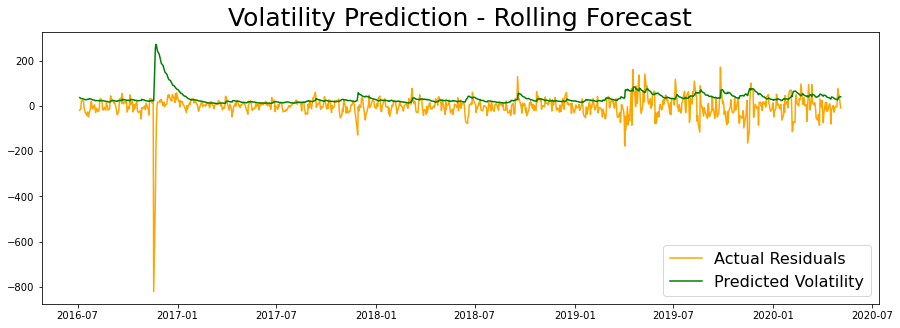

In [137]:
plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 2 Model

In [138]:
model_3 = arch_model(resid_df,p=2,q=0)
model_fit_3 = model_3.fit(disp='off')
model_fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -25244.7
Distribution:                  Normal   AIC:                           50497.3
Method:            Maximum Likelihood   BIC:                           50523.6
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:00:52   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -4.2678      2.120     -2.013  4.414e-02 [ -8.424, -0.112]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        230.3811     30.476      7.559  4.049e-14 [1.706e+02,2.901e+02]
alpha[1]       0.6853      0.260      2.641  8.272e-03     [  0.177,  1.194]
alpha[2]       0.3147      0.119      2.644  8.201e-03   [8.138e-02,  0.548]
============================================================================

Covariance estimator: robust
"""

In [139]:
rolling_predictions = []
test_size = 1000

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

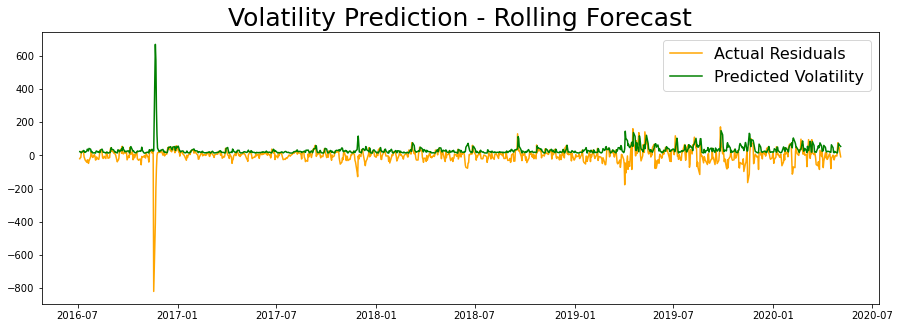

In [140]:
plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH (2,2) Model

In [141]:
model_4 = arch_model(resid_df,p=2,q=2)
model_fit_4 = model_4.fit(disp='off')
model_fit_4.summary()

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24150.4
Distribution:                  Normal   AIC:                           48312.7
Method:            Maximum Likelihood   BIC:                           48352.2
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:04:43   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1898      0.523      0.363      0.717 [ -0.835,  1.215]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          4.5201     10.810      0.418      0.676      [-16.668, 25.708]
alpha[1]       0.1810  4.408e-02      4.108  3.999e-05    [9.465e-02,  0.267]
alpha[2]   8.4009e-05  1.838e-02  4.572e-03      0.996 [-3.593e-02,3.610e-02]
beta[1]    4.3839e-05  2.029e-02  2.161e-03      0.998 [-3.972e-02,3.981e-02]
beta[2]        0.8191      0.132      6.183  6.272e-10      [  0.559,  1.079]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [142]:
rolling_predictions = []
test_size = 1000

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

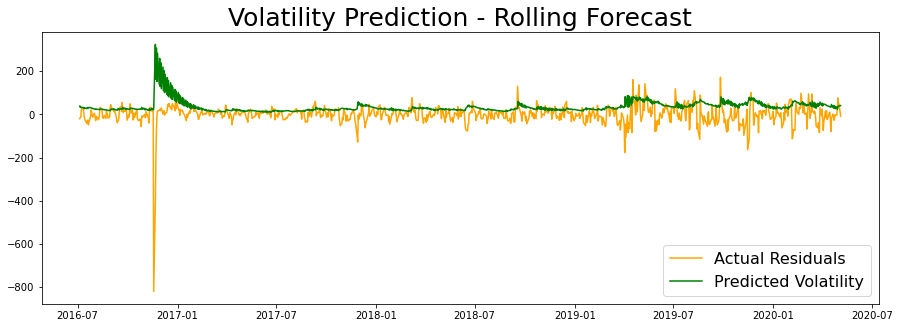

In [143]:
plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH (1,2) Model

In [144]:
model_5 = arch_model(resid_df,p=1,q=2)
model_fit_5 = model_5.fit(disp='off')
model_fit_5.summary()

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24151.1
Distribution:                  Normal   AIC:                           48312.3
Method:            Maximum Likelihood   BIC:                           48345.2
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:08:22   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1884      0.478      0.394      0.694 [ -0.749,  1.125]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          4.5483      9.864      0.461      0.645      [-14.785, 23.881]
alpha[1]       0.1811  4.893e-02      3.700  2.153e-04    [8.516e-02,  0.277]
beta[1]    2.8233e-08  2.878e-02  9.809e-07      1.000 [-5.641e-02,5.641e-02]
beta[2]        0.8190      0.132      6.193  5.911e-10      [  0.560,  1.078]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

##### GARCH (2,1) Model

In [145]:
model_6 = arch_model(resid_df,p=2,q=1)
model_fit_6 = model_6.fit(disp='off')
model_fit_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24291.3
Distribution:                  Normal   AIC:                           48592.6
Method:            Maximum Likelihood   BIC:                           48625.5
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:08:45   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3913      1.964     -0.199      0.842 [ -4.241,  3.459]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.5911     17.701      0.203      0.839    [-31.103, 38.285]
alpha[1]       0.1223  8.174e-02      1.496      0.135 [-3.791e-02,  0.283]
alpha[2]       0.0000      0.268      0.000      1.000    [ -0.526,  0.526]
beta[1]        0.8776      0.230      3.808  1.399e-04    [  0.426,  1.329]
===========================================================================

Covariance estimator: robust
"""

##### ARCH - 3 Model

In [146]:
model_7 = arch_model(resid_df,p=3,q=0)
model_fit_7 = model_7.fit(disp='off')
model_fit_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -24709.8
Distribution:                  Normal   AIC:                           49429.5
Method:            Maximum Likelihood   BIC:                           49462.4
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:10:12   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -2.0268      1.621     -1.250      0.211 [ -5.204,  1.151]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        138.6460     18.679      7.422  1.150e-13 [1.020e+02,1.753e+02]
alpha[1]       0.3493  6.300e-02      5.545  2.942e-08     [  0.226,  0.473]
alpha[2]       0.3717      0.171      2.170  3.002e-02   [3.595e-02,  0.707]
alpha[3]       0.2790      0.124      2.256  2.410e-02   [3.656e-02,  0.521]
============================================================================

Covariance estimator: robust
"""

In [147]:
rolling_predictions = []
test_size = 1000

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

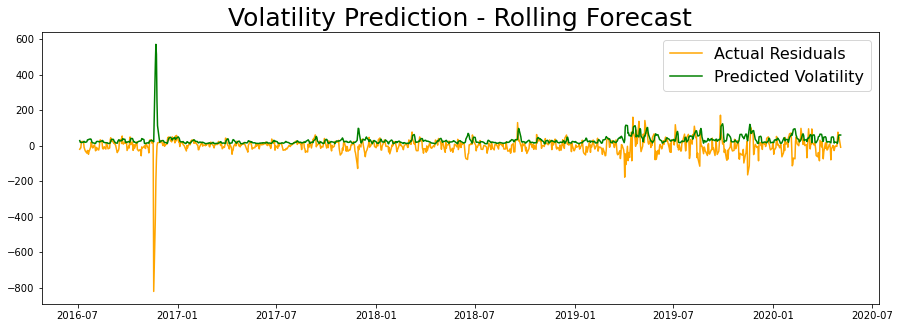

In [149]:
plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH (3,1) Model

In [148]:
model_8 = arch_model(resid_df,p=3,q=1)
model_fit_8 = model_8.fit(disp='off')
model_fit_8.summary()

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24290.0
Distribution:                  Normal   AIC:                           48592.0
Method:            Maximum Likelihood   BIC:                           48631.4
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:13:00   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3804      1.067     -0.357      0.721 [ -2.471,  1.710]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.6104      8.463      0.427      0.670   [-12.977, 20.198]
alpha[1]       0.1223  4.697e-02      2.604  9.207e-03 [3.026e-02,  0.214]
alpha[2]   1.5472e-05      0.125  1.237e-04      1.000   [ -0.245,  0.245]
alpha[3]   7.4844e-08      0.163  4.604e-07      1.000   [ -0.319,  0.319]
beta[1]        0.8777      0.119      7.346  2.045e-13   [  0.644,  1.112]
==========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

##### GARCH (1,3) Model

In [155]:
model_9 = arch_model(resid_df,p=1,q=3)
model_fit_9 = model_9.fit(disp='off')
model_fit_9.summary()

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24155.3
Distribution:                  Normal   AIC:                           48322.5
Method:            Maximum Likelihood   BIC:                           48362.0
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:18:41   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2043      0.392     -0.521      0.603 [ -0.974,  0.565]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.3609      8.308      0.525      0.600   [-11.922, 20.644]
alpha[1]       0.2192  5.106e-02      4.293  1.761e-05   [  0.119,  0.319]
beta[1]        0.1402  3.350e-02      4.186  2.838e-05 [7.458e-02,  0.206]
beta[2]    3.4787e-06      0.123  2.820e-05      1.000   [ -0.242,  0.242]
beta[3]        0.6406      0.106      6.026  1.676e-09   [  0.432,  0.849]
==========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [156]:
rolling_predictions = []
test_size = 1000

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

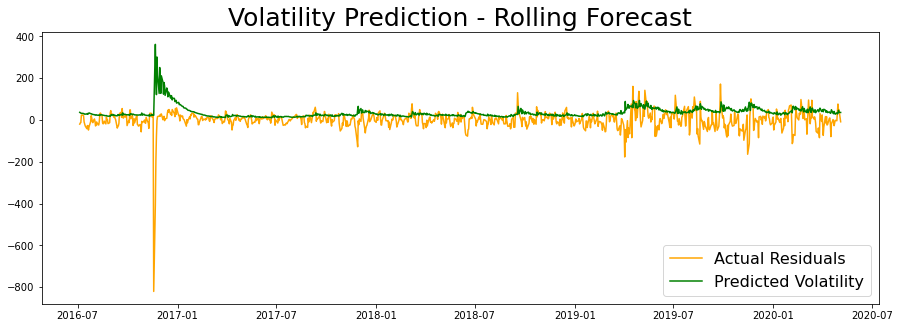

In [157]:
plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH (3,2) Model

In [151]:
model_10 = arch_model(resid_df,p=3,q=2)
model_fit_10 = model_10.fit(disp='off')
model_fit_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24151.4
Distribution:                  Normal   AIC:                           48316.7
Method:            Maximum Likelihood   BIC:                           48362.8
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:16:55   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1889      0.543      0.348      0.728 [ -0.875,  1.253]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          4.5405     19.548      0.232      0.816      [-33.774, 42.855]
alpha[1]       0.1810  5.403e-02      3.349  8.106e-04    [7.507e-02,  0.287]
alpha[2]   5.9688e-08  3.036e-02  1.966e-06      1.000 [-5.950e-02,5.950e-02]
alpha[3]   8.4946e-09      0.167  5.097e-08      1.000      [ -0.327,  0.327]
beta[1]    4.6842e-08  1.946e-02  2.407e-06      1.000 [-3.813e-02,3.813e-02]
beta[2]        0.8190      0.237      3.451  5.589e-04      [  0.354,  1.284]
=============================================================================

Covariance estimator: robust
"""

##### GARCH (2,3) Model

In [152]:
model_11 = arch_model(resid_df,p=2,q=3)
model_fit_11 = model_11.fit(disp='off')
model_fit_11.summary()

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24153.9
Distribution:                  Normal   AIC:                           48321.8
Method:            Maximum Likelihood   BIC:                           48367.8
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:16:59   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2002      0.490     -0.408      0.683 [ -1.161,  0.761]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.3226     14.986      0.288      0.773    [-25.050, 33.695]
alpha[1]       0.2193      0.119      1.845  6.499e-02 [-1.363e-02,  0.452]
alpha[2]   1.3023e-05      0.232  5.604e-05      1.000    [ -0.455,  0.456]
beta[1]        0.1404      0.276      0.509      0.611    [ -0.400,  0.681]
beta[2]        0.0000  8.818e-02      0.000      1.000    [ -0.173,  0.173]
beta[3]        0.6407      0.136      4.708  2.505e-06    [  0.374,  0.907]
===========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

##### GARCH (3,3) Model

In [153]:
model_12 = arch_model(resid_df,p=3,q=3)
model_fit_12 = model_12.fit(disp='off')
model_fit_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -24155.3
Distribution:                  Normal   AIC:                           48326.6
Method:            Maximum Likelihood   BIC:                           48379.2
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:17:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2025      0.524     -0.386      0.699 [ -1.230,  0.825]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.3580     17.023      0.256      0.798   [-29.006, 37.722]
alpha[1]       0.2191  7.940e-02      2.760  5.779e-03 [6.353e-02,  0.375]
alpha[2]   5.0315e-09      0.180  2.800e-08      1.000   [ -0.352,  0.352]
alpha[3]   4.1600e-08  9.857e-02  4.220e-07      1.000   [ -0.193,  0.193]
beta[1]        0.1403      0.230      0.611      0.541   [ -0.310,  0.590]
beta[2]    9.5588e-08      0.124  7.737e-07      1.000   [ -0.242,  0.242]
beta[3]        0.6406  4.384e-02     14.611  2.388e-48   [  0.555,  0.726]
==========================================================================

Covariance estimator: robust
"""

##### ARCH - 3 Model

In [158]:
model_13 = arch_model(resid_df,p=3,q=0)
model_fit_13 = model_13.fit(disp='off')
model_fit_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -24709.8
Distribution:                  Normal   AIC:                           49429.5
Method:            Maximum Likelihood   BIC:                           49462.4
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:22:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -2.0268      1.621     -1.250      0.211 [ -5.204,  1.151]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        138.6460     18.679      7.422  1.150e-13 [1.020e+02,1.753e+02]
alpha[1]       0.3493  6.300e-02      5.545  2.942e-08     [  0.226,  0.473]
alpha[2]       0.3717      0.171      2.170  3.002e-02   [3.595e-02,  0.707]
alpha[3]       0.2790      0.124      2.256  2.410e-02   [3.656e-02,  0.521]
============================================================================

Covariance estimator: robust
"""

In [159]:
rolling_predictions = []
test_size = 1000

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

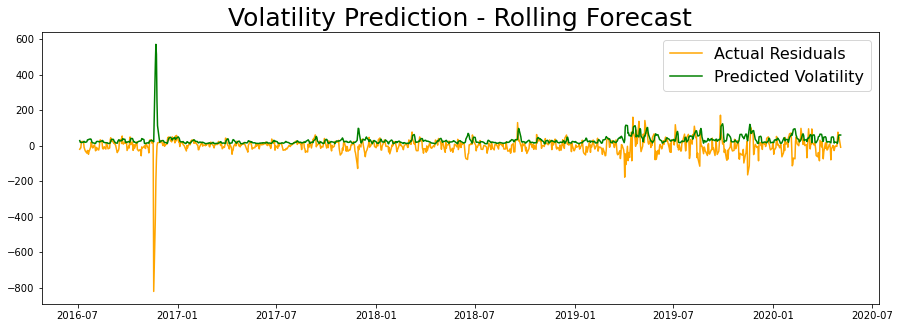

In [160]:
plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 4 Model

In [161]:
model_14 = arch_model(resid_df,p=4,q=0)
model_fit_14 = model_14.fit(disp='off')
model_fit_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -24510.5
Distribution:                  Normal   AIC:                           49033.0
Method:            Maximum Likelihood   BIC:                           49072.5
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:24:54   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -1.9983      1.173     -1.703  8.851e-02 [ -4.298,  0.301]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega        104.4423     15.164      6.888  5.674e-12 [ 74.722,1.342e+02]
alpha[1]       0.3130  3.618e-02      8.652  5.043e-18   [  0.242,  0.384]
alpha[2]       0.1467  4.626e-02      3.172  1.512e-03 [5.608e-02,  0.237]
alpha[3]       0.2717      0.128      2.118  3.421e-02 [2.023e-02,  0.523]
alpha[4]       0.2685      0.137      1.965  4.941e-02 [6.878e-04,  0.536]
==========================================================================

Covariance estimator: robust
"""

In [162]:
rolling_predictions = []
test_size = 1000

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=4, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

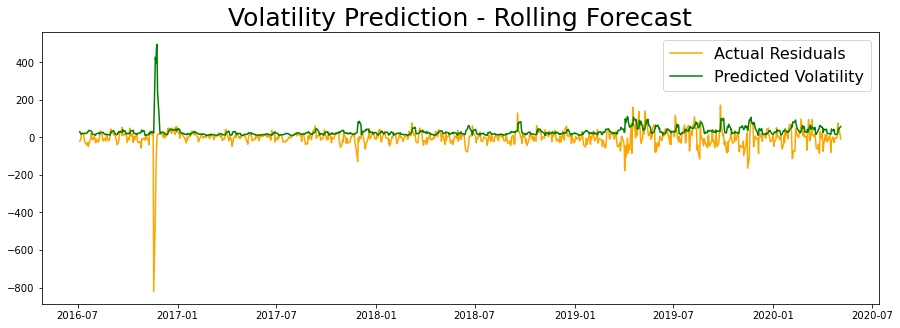

In [163]:
plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 5 Model

In [164]:
model_15 = arch_model(resid_df,p=5,q=0)
model_fit_15 = model_15.fit(disp='off')
model_fit_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -24379.1
Distribution:                  Normal   AIC:                           48772.2
Method:            Maximum Likelihood   BIC:                           48818.2
                                        No. Observations:                 5306
Date:                Sun, Mar 27 2022   Df Residuals:                     5305
Time:                        16:31:33   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -1.2016      0.884     -1.360      0.174 [ -2.934,  0.530]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         86.1091     13.754      6.261  3.828e-10  [ 59.153,1.131e+02]
alpha[1]       0.2879  3.066e-02      9.389  6.072e-21    [  0.228,  0.348]
alpha[2]       0.0615  2.338e-02      2.630  8.541e-03  [1.566e-02,  0.107]
alpha[3]       0.2458      0.131      1.882  5.988e-02 [-1.023e-02,  0.502]
alpha[4]       0.1116  5.968e-02      1.870  6.145e-02 [-5.355e-03,  0.229]
alpha[5]       0.2933      0.125      2.348  1.888e-02  [4.844e-02,  0.538]
===========================================================================

Covariance estimator: robust
"""

In [165]:
rolling_predictions = []
test_size = 1000

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=5, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


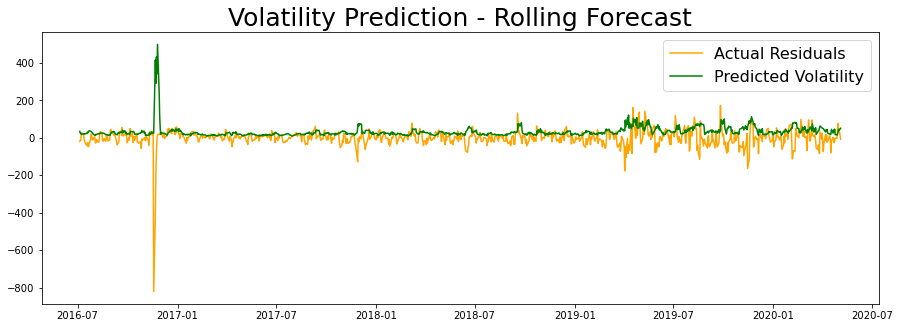

In [166]:
plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

### Future Predictions

##### ARCH - 1 Prediction

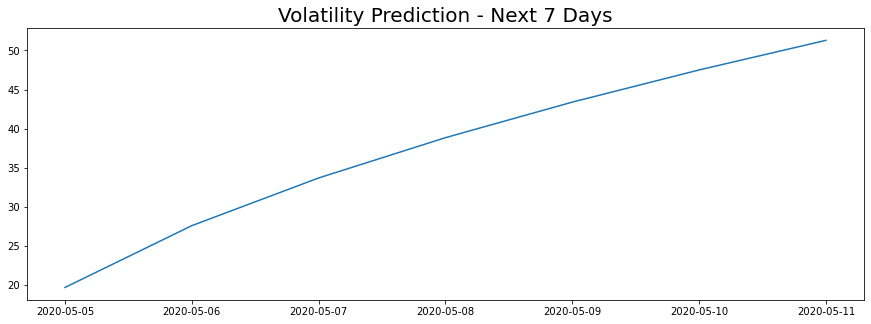

In [167]:
final_df = resid_df
final_model = arch_model(final_df, p=1, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 3 Prediction

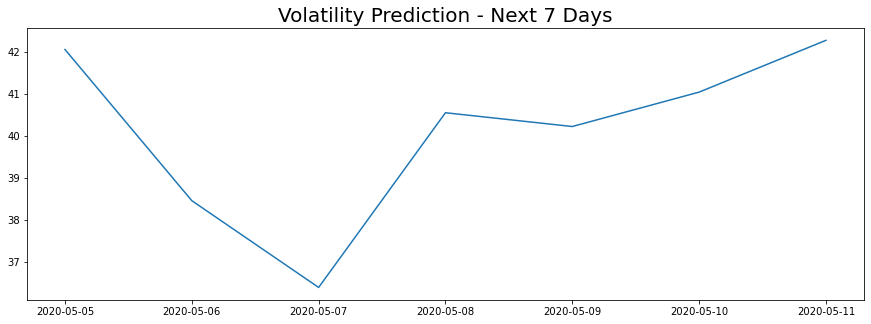

In [168]:
final_df = resid_df
final_model = arch_model(final_df, p=3, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 5 Prediction

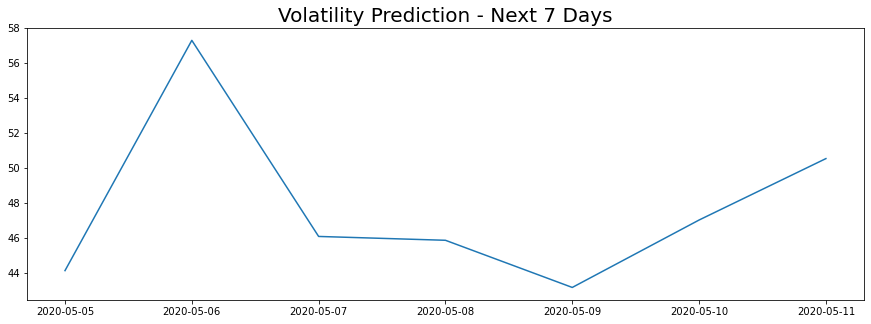

In [169]:
final_df = resid_df
final_model = arch_model(final_df, p=5, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### Conclusion:

- Based on the significance of the model parameters and the AIC Score, we can conclude that the ARCH - 5 Model is the best fit model and the future predictions can be done using this model.